# **Sublission 01 - BBC News - NLP**
### **Nur Imam Masri**
### **nurimammasri.01@gmail.com**

# **Import Library**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
plt.style.use('seaborn')

# **Data Loading**

[BBC News Archive](https://www.kaggle.com/hgultekin/bbcnewsarchive)

News article datasets, originating from BBC News, provided for use as benchmarks for machine learning research. The original data is processed to form a single csv file for ease of use, the news title and the related text file name is preserved along with the news content and its category. This dataset is made available for non-commercial and research purposes only.

**Content**

* Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.

* Class Labels: 5 (business, entertainment, politics, sport, tech)

**Columns**

* category
* filename
* title
* content







Data yang digunakan berasal dari Dataset dari kaggle yang memiliki dataset:

* bbc-news-data.csv

In [3]:
import pandas as pd
df_news = pd.read_csv('https://drive.google.com/uc?id=1dnh0C3N1geyJqFcwk-rLuF2KhRz3TePS', sep='\t')
df_news.head()

category  ...                                            content
0  business  ...   Quarterly profits at US media giant TimeWarne...
1  business  ...   The dollar has hit its highest level against ...
2  business  ...   The owners of embattled Russian oil giant Yuk...
3  business  ...   British Airways has blamed high fuel prices f...
4  business  ...   Shares in UK drinks and food firm Allied Dome...

[5 rows x 4 columns]

Menampilkan daftar columns

In [4]:
df_news.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

Pada kolom Sentiment tertera label dari tweet.

In [5]:
df_news['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

Ada 2225 baris data yang berarti ada 2225 news

2 kolom yang berarti 2 columns (Features)

In [6]:
# the shape of data
print('Total Row:', df_news.shape[0])
print('Total Columns:', df_news.shape[1])
df_news.shape

Total Row: 2225
Total Columns: 4


(2225, 4)

# **Data Visualization**

Visualisasi banyak category sentiment dari news

In [7]:
df_news['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

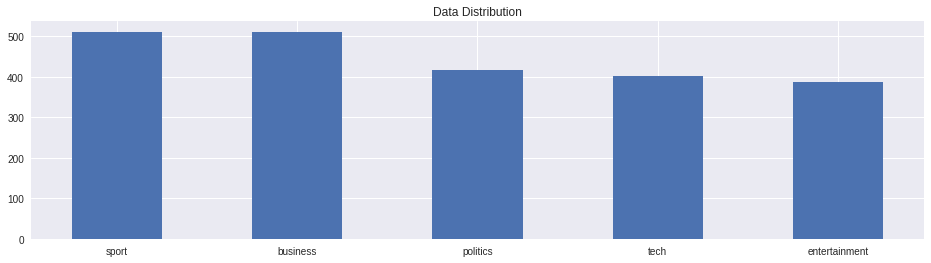

In [8]:
fig = plt.figure(figsize=(16, 4))

category = df_news['category'].value_counts()

plt.bar(x=category.index, height=category.values, width=0.5)

plt.title('Data Distribution')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


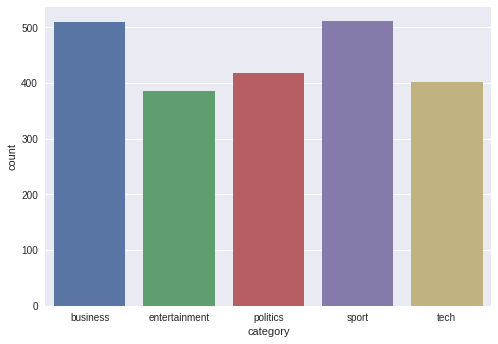

In [9]:
sns.countplot(df_news['category'])

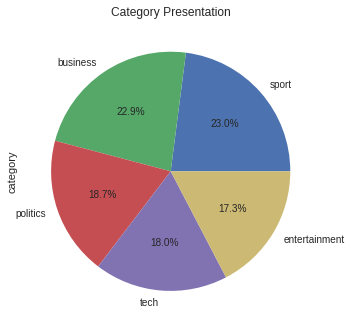

In [10]:
category = df_news['category'].value_counts()
label = category.index
category.plot(kind='pie', labels=label, autopct='%1.1f%%')
plt.title('Category Presentation')
plt.show()

# **Data Preprocessing**

Data yang dibutuhkan sebagai features adalah 'category', 'title' dan 'content'. Maka selain itu akan di drop.

In [11]:
df_news.head(3)

category  ...                                            content
0  business  ...   Quarterly profits at US media giant TimeWarne...
1  business  ...   The dollar has hit its highest level against ...
2  business  ...   The owners of embattled Russian oil giant Yuk...

[3 rows x 4 columns]

In [12]:
df_news = df_news.drop(columns=['filename'])

In [13]:
df_news.head(2)

category  ...                                            content
0  business  ...   Quarterly profits at US media giant TimeWarne...
1  business  ...   The dollar has hit its highest level against ...

[2 rows x 3 columns]

**Handling Missing Value**

Untuk mengefektifkan model dalam mempelajari data dilakukan cleaning data dari missing value. Namun dari pengecekan data tidak memiliki missing value.

In [14]:
df_news.isnull().any()

category    False
title       False
content     False
dtype: bool

**Handling Categorical Value**

Karena label sentiment berupa data kategorikal, maka kita perlu melakukan proses one-hot-encoding. Jalankan kode di bawah untuk melakukan one-hot-encoding dan membuat dataframe baru.

In [15]:
category = pd.get_dummies(df_news['category'])
new_df_news = pd.concat([df_news, category], axis=1)
new_df_news = new_df_news.drop(columns='category')
new_df_news.head()

title  ... tech
0  Ad sales boost Time Warner profit  ...    0
1   Dollar gains on Greenspan speech  ...    0
2  Yukos unit buyer faces loan claim  ...    0
3  High fuel prices hit BA's profits  ...    0
4  Pernod takeover talk lifts Domecq  ...    0

[5 rows x 7 columns]

In [16]:
import re
from string import punctuation
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
nltk.download('averaged_perceptron_tagger')

def process_text(text):
  # Convert string to str
  text = str(text) 

  # Lowers the string
  text = text.lower()

  # Removes the full url
  url_remove = re.compile(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
  text = re.sub(url_remove,' ',text)

  # Removes the punctuation
  text = ''.join([string for string in text if string not in punctuation and not string.isdigit()])

  # Removes any more special characters
  special_character = re.compile(r'[^a-zA-Z]')
  text = re.sub(special_character,' ', text)
  text = text.strip() # Strip white spaces
  text = text.split(' ')

  # Removing all stop words
  text = ' '.join([string for string in text if string not in stopwords.words('english')]) 

  # removing number
  text = re.sub('[0-9]+','',text)

  # lematization
  lemmatizer = WordNetLemmatizer()
  pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
  text = (' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [17]:
new_df_news.loc[:, ['title']] = new_df_news['title'].apply(process_text)
new_df_news.loc[:, ['content']] = new_df_news['content'].apply(process_text)

In [18]:
new_df_news.head()

title  ... tech
0  ad sale boost time warner profit  ...    0
1      dollar gain greenspan speech  ...    0
2  yukos unit buyer face loan claim  ...    0
3     high fuel price hit ba profit  ...    0
4  pernod takeover talk lift domecq  ...    0

[5 rows x 7 columns]

**Split Data**

Selanjutnya dilakukan ektraksi data.

Maka kita tinggal mengektraksi label dan featuresnya

Prepare Feature and Label

* `feature` data set biasa disebut independent data set (X), yakni columns

* `target` data set also known as the dependent data set (Y)

Kemudian selanjutnya akan di split antara data training dan data testing

Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.

In [19]:
news_columns = ['title', 'content']
label_columns = [column for column in new_df_news.columns if column not in news_columns]

In [20]:
news = [",".join(item) for item in new_df_news[news_columns].values.astype(str)]
label = new_df_news[label_columns].values

Lalu, bagi data untuk training dan data untuk testing, dengan presentasi 80% Training set dan 20% Validation set.

In [21]:
from sklearn.model_selection import train_test_split
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size=0.2 ,random_state=42, shuffle = True)

**Tokenizing**

Kemudian kita ubah setiap kata pada dataset kita ke dalam bilangan numerik dengan fungsi Tokenizer. Setelah tokenisasi selesai, kita perlu membuat mengonversi setiap sampel menjadi sequence.

In [22]:
size = 10000
embedding_dim = 64
max_len = 256
trunc_type = "post"
oov = "x"

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=size, oov_token=oov)
tokenizer.fit_on_texts(news_train) 
tokenizer.fit_on_texts(news_test)
 
sekuens_train = tokenizer.texts_to_sequences(news_train)
sekuens_test = tokenizer.texts_to_sequences(news_test)
 
padded_train = pad_sequences(sekuens_train, maxlen=max_len, truncating=trunc_type) 
padded_test = pad_sequences(sekuens_test, maxlen=max_len, truncating=trunc_type)

# **Data Modelling**

In [24]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=size, output_dim=embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 64)           640000    
_________________________________________________________________
bidirectional (Bidirectional (None, 256, 512)          657408    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1

Selanjutnya kita buat kelas callback. fungsi yang paling penting yaitu `on_epoch_end()`. Fungsi inilah yang akan kita gunakan untuk memberitahu model agar berhenti melakukan pelatihan ketika telah mencapai target.

Kode `self.model.stop_training = True` adalah kode yang memberi tahu model untuk menghentikan pelatihan.

In [26]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 95%!")
callbacks = myCallback()

Terakhir kita dapat mulai melatih model kita dengan memanggil fungsi fit().

In [27]:
num_epochs = 50
history = model.fit(padded_train, label_train, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), callbacks=[callbacks], verbose=2)

Epoch 1/50
56/56 - 85s - loss: 1.5830 - accuracy: 0.2624 - val_loss: 1.5465 - val_accuracy: 0.3618
Epoch 2/50
56/56 - 79s - loss: 1.3741 - accuracy: 0.3826 - val_loss: 1.0886 - val_accuracy: 0.5775
Epoch 3/50
56/56 - 79s - loss: 0.7919 - accuracy: 0.6899 - val_loss: 0.4740 - val_accuracy: 0.8494
Epoch 4/50
56/56 - 79s - loss: 0.3166 - accuracy: 0.8933 - val_loss: 0.3807 - val_accuracy: 0.8697
Epoch 5/50
56/56 - 79s - loss: 0.1092 - accuracy: 0.9680 - val_loss: 0.2562 - val_accuracy: 0.9416
Epoch 6/50
56/56 - 77s - loss: 0.0287 - accuracy: 0.9938 - val_loss: 0.1777 - val_accuracy: 0.9573

The accuracy of the training set and the validation set has reached > 95%!


**Plot Loss dan Akurasi**

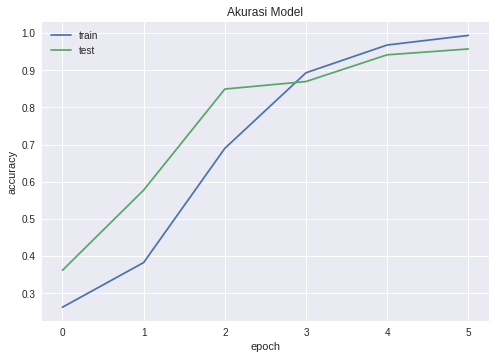

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

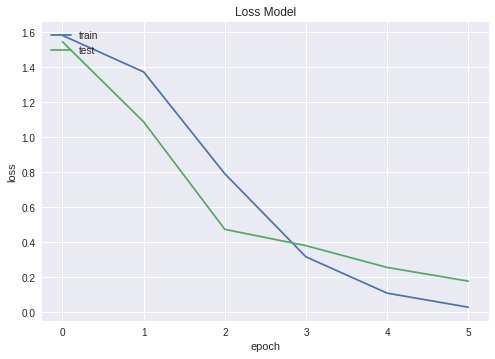

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()